**Table of contents**<a id='toc0_'></a>    
- 0. [Imports](#toc1_)    
- 0. [Model class](#toc2_)    
- 1. [Basic Edgeworth box](#toc2_1_)  
- 2. [Market clearing condition](#toc2_2_)  
- 3. [Market clearing price](#toc2_3_)
- 4. [Agent A chooses price](#toc2_4_)
	- 4.a. [in set $P$](#toc2_4_a_)
  	- 4.b. [in all positive prices](#toc2_4_b_)
- 5. [Agent A chooses Agent B's consumption](#toc2_5_)
	- 5.a. [in set $P$](#toc2_5_a_)
	- 5.b. [in all positive prices](#toc2_5_b_)
- 6. [Utilitarian social planner](#toc2_6_)
	- 6.a. [allocation](#toc2_6_a_)
	- 6.b. [discuss and compare](#toc2_6_b_)
- 7. [Draw random set](#toc2_7_)
- 8. [Equilibrium for each set](#toc2_8_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### 0. <a id='toc1_'></a>[Imports](#toc0_)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 0. <a id='toc2_'></a>[Model class](#toc0_)

In [13]:
from ExchangeEconomy import ExchangeEconomyClass
model = ExchangeEconomyClass()

### 1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [14]:
# a. Start by imposing each agents initial endowment
w1a = 0.8 
w2a = 0.3
w1b = 1-w1a
w2b = 1-w2a


# b. Calculating their initial utility
max_a = model.utility_A(w1a,w2a)
max_b = model.utility_B(w1b,w2b)

# c. Create an empty vector
better_pairs = []

# d. Loop for x1A and x2a in 

# Outer loop
for x1a in np.linspace(0,1,75):
    x1b = 1-x1a
    # Inner loop
    for x2a in np.linspace(0,1,75):
        x2b = 1-x2a

        current_a = model.utility_A(x1a,x2a)
        current_b = model.utility_B(x1b,x2b)

        if current_a >= max_a and current_b >= max_b:
            better_pairs.append((x1a,x2a))
            
print('We find that there are',len(better_pairs),'combinations that are better than the agents initial endowments. \nNote, though, that the number 1,543 depends on the number of points in our grids of x1a and x1b. \nHence, for another N, the number would differ from 1,543')


We find that there are 1543 combinations that are better than the agents initial endowments. 
Note, though, that the number 1,543 depends on the number of points in our grids of x1a and x1b. 
Hence, for another N, the number would differ from 1,543


Below we sketh the combinations in the Edgeworth-Box

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


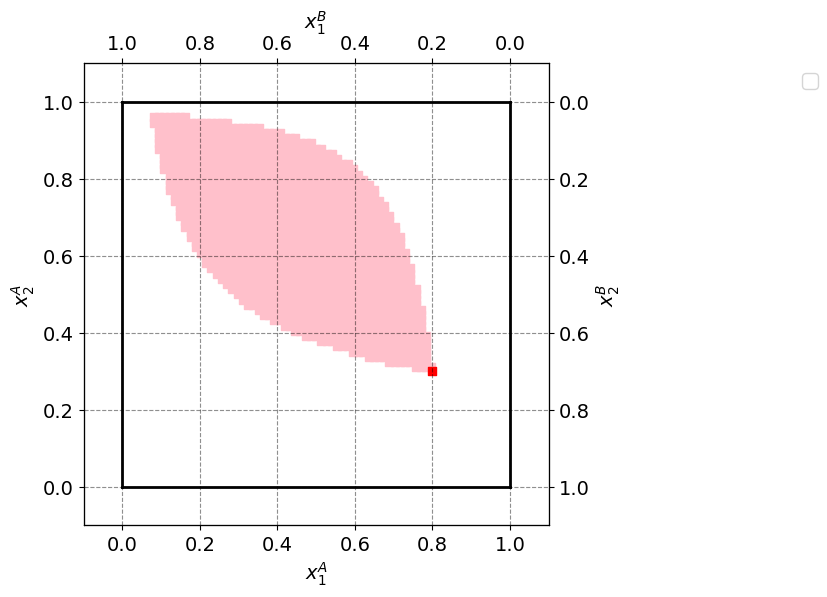

In [15]:
par = model.par
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Inserting out results in the Edgeworth Box
for i in better_pairs:
    ax_A.scatter(i[0],i[1],marker='s',color='pink')

ax_A.scatter(par.w1A,par.w2A,marker='s',color='red')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')   

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

### 2. <a id='toc2_2_'></a>[Market clearing condition](#toc0_)

In [16]:
# Make lists of epsilon
eps1_list = []
eps2_list = []

min_sum = 10000
ind = 10000
p1 = np.linspace(0.5,2.5,75)

for i, k in enumerate(p1):
    eps1, eps2 = model.check_market_clearing(k)

    if abs(eps1) + abs(eps2) < min_sum:
        ind = i
        min_sum = abs(eps1) + abs(eps2)


    eps1_list.append(eps1) 
    eps2_list.append(eps2)
    
print("Minimum sum found at p1 = ",p1[ind], "at index", ind, "with value", abs(eps1_list[ind]) + abs(eps2_list[ind]))

Minimum sum found at p1 =  0.9324324324324325 at index 16 with value 0.014936675806240751


In [17]:
print(f'At the price found above the values of epsilons are as follows: \ne1 = {eps1_list[ind]}')
print(f'e2 = {eps2_list[ind]}')

At the price found above the values of epsilons are as follows: 
e1 = 0.007729468599033729
e2 = -0.007207207207207023


### 3. <a id='toc2_3_'></a>[Market clearing price](#toc0_)

We know that if one market clear, then the other market does aswell (Walras law). We will in the following code minimize the $\epsilon_1$ value which should clear the market for good 1 (and good 2).

In [18]:
from scipy import optimize

# objective function
def objective_func(p1):
    eps1, _ = model.check_market_clearing(p1)
    return abs(eps1)

# call the solver
res = optimize.minimize_scalar(
    objective_func,
    bounds=(0,1e6),
    method='bounded')

# unpack the results
optimal_p1 = res.x
optimal_eps1, _ = model.check_market_clearing(optimal_p1)

print(f"Optimal value of p1: {optimal_p1:.5f} and epsilon value of {optimal_eps1:.5f}")

Optimal value of p1: 0.94445 and epsilon value of -0.00000


We find the price to be 0.944 which clears the market for good 1 and good 2. This method is more accurate as it runs through all numbers between 0.5 and 2.5, and not just 75 numbers. 

### 4. <a id='toc2_4_'></a>[Agent A chooses price](#toc0_)

Agent A sets the price to maximize own utility.

#### 4.a. <a id='toc2_4_a_'></a>[in set $P$](#toc0_)

Find the allocation if only prices in $P_{1}$ can be chosen

$$
\underset{p_{1}\in P_{1}}{max} \quad u^{A}(1-x_{1}^{B}\bold{(P,\omega^{B})},1-x_{2}^{B}\bold{(P,\omega^{B})})
$$


In [19]:
optimal_utility, optimal_price, optimal_allocation = model.optimal_allocation()
allocation_B = tuple(1-value for value in optimal_allocation)
allocation_x1B, allocation_x2B = allocation_B
optimal_utility_B = model.utility_B(allocation_x1B,allocation_x2B)

print(f'We find that Agent A sets the optimal price, {optimal_price:.5f}.\nAgent B then chooses consumption (x1,x2) = {allocation_B}.')
print(f'Agent A is left with consumption (x1,x2) = {optimal_allocation}')
print(f'At these allocations, the agents get utility:\nAgent A = {optimal_utility:.5f}\nAgent B = {optimal_utility_B:.5f}')

We find that Agent A sets the optimal price, 1.90541.
Agent B then chooses consumption (x1,x2) = (0.37825059101654834, 0.36036036036036034).
Agent A is left with consumption (x1,x2) = (0.6217494089834517, 0.6396396396396397)
At these allocations, the agents get utility:
Agent A = 0.63362
Agent B = 0.37219


#### 4.b. <a id='toc2_4_a_'></a>[in all positive prices](#toc0_)

Find the price if any positive price can be chosen

$$
\underset{p_{1}>0}{max} \quad u^{A}(1-x_{1}^{B}\bold{(P,\omega^{B})},1-x_{2}^{B}\bold{(P,\omega^{B})})
$$

In [20]:
from scipy.optimize import minimize
def obj(p1):

        x1_B_star,x2_B_star = model.demand_B(p1)

        remaining_x1A = 1 - x1_B_star
        remaining_x2A = 1 - x2_B_star

        if remaining_x1A > 0 or remaining_x2A > 0:
                utility_for_A = model.utility_A(remaining_x1A,remaining_x2A)       
        else:
                utility_for_A = 0

        return -utility_for_A

# Assuming you have a 'model' object already defined
res = optimize.minimize_scalar(obj,bounds=(0,30),method='Bounded') 

optimal_price = res.x
utility_nu = -res.fun

demand_B = model.demand_B(optimal_price)

print(f'Agent A now sets the price at p1 = {optimal_price:.5f}. \nAt this price Agent B chooses consumption (x1,x2) = {demand_B}. \nAgent A consumes what is left yielding the utility, {utility_nu:.5f}.')

Agent A now sets the price at p1 = 1.89935. 
At this price Agent B chooses consumption (x1,x2) = (0.3790319072191105, 0.35995641713509097). 
Agent A consumes what is left yielding the utility, 0.63362.


The result is similar to what we found previously. Again, the difference is the solver versus the linspace method. 

### 5. <a id='toc2_4_'></a>[Agent A chooses Agent B's consumption](#toc0_)

Now Agent A chooses Agent B's consumption, but only such that Agent B is not worse off than the initial endowment.

#### 5.a. <a id='toc2_4_a_'></a>[in set $C$](#toc0_)

The set available is $C$

$$\underset{(x_{1},x_{2})\in C}{max}u^{A}(x_{1}^{A},x_{2}^{A})$$

In [21]:
def best():
    # Initial endowment
    w1a = 0.8 
    w2a = 0.3
    w1b = 1 - w1a
    w2b = 1 - w2a

    # Initial utility for A and B
    initial_utility_A = model.utility_A(w1a, w2a)
    initial_utility_B = model.utility_B(w1b, w2b)

    best_x1a, best_x2a, best_x1b, best_x2b = None, None, None, None
    best_utility_A = float('-inf')

    # Chooses x1 in the interval 0-1 and allocates the rest to B
    for x1a in np.linspace(0, 1, 75):
        x1b = 1 - x1a
        # Chooses x2 in the interval 0-1 and allocates the rest to B
        for x2a in np.linspace(0, 1, 75):
            x2b = 1 - x2a

            # Defining the current utility
            current_utility_A = model.utility_A(x1a, x2a)
            current_utility_B = model.utility_B(x1b, x2b)

            # Requires the new utility to be greater than the initial utility for both agents
            if current_utility_A >= initial_utility_A and current_utility_B >= initial_utility_B:
                if current_utility_A > best_utility_A:
                    best_utility_A = current_utility_A
                    best_x1a, best_x2a, best_x1b, best_x2b = x1a, x2a, x1b, x2b
            
    return best_x1a, best_x2a, best_x1b, best_x2b

x1A,x2A,x1B,x2B = best()

print(f'Agent A chooses consumption:          (x1,x2) = ({x1A:.3f},{x2A:.3f})\nAgent A chooses Agent Bs consumption: (x1,x2) = ({x1B:.3f},{x2B:.3f})')
print(f'This leaves Agent A with utility:  {model.utility_A(x1A,x2A):.3f}\nWhich leaves Agent B with utility: {model.utility_B(x1B,x2B):.3f} (slighty better than initial utility)')

Agent A chooses consumption:          (x1,x2) = (0.581,0.838)
Agent A chooses Agent Bs consumption: (x1,x2) = (0.419,0.162)
This leaves Agent A with utility:  0.742
Which leaves Agent B with utility: 0.305 (slighty better than initial utility)


#### 5.b. <a id='toc2_4_a_'></a>[in all allocations](#toc0_)

Find the allocation if no further restrictions are imposed

$$
\underset{(x_{1}^{A},x_{2}^{A})\in [0,1]x[0,1]}{max}u^{A}(x_{1}^{A},x_{2}^{A})
$$

In [22]:
def objective_function(x):
    # Extract consumption choices for Agent A
    x1a, x2a = x
    
    # Calculate utility for Agent A
    u_A = model.utility_A(x1a, x2a)
    
    # Return negative utility for Agent A (da vi vil maksimere)
    return -u_A

def constraint_function(x):
    # Calculate consumption choices for Agent B
    x1b = 1 - x[0]
    x2b = 1 - x[1]
    
    # Calculate utility for Agent B
    u_B = model.utility_B(x1b, x2b)

    # Calculate initial utility for Agent B
    w1b = 0.2
    w2b = 0.7
    initial_utility_B = model.utility_B(w1b,w2b)
    
    # Return the difference between utility for B and initial utility for B
    return u_B - initial_utility_B

# Set bounds for consumption choices for Agent A
bounds = [(0, 1), (0, 1)]

# Define constraints
constraints = [{'type': 'ineq', 'fun': constraint_function}]

# Initial guess for consumption choices for Agent A
initial_guess = np.array([0.8, 0.3])

# Optimize the objective function
res = minimize(objective_function, x0=initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

x1A = res.x[0]
x1B = 1 - x1A
x2A = res.x[1]
x2B = 1 - x2A 
utility_for_A = -res.fun
utility_for_B = model.utility_B(x1B,x2B)

print(f'Agent A chooses consumption      (x1,x2) = ({x1A:.5f},{x2A:.5f}) which yields utility {utility_for_A:.5f}')
print(f'Agent B is left with consumption (x1,x2) = ({x1B:.5f},{x2B:.5f}) which yields utility {utility_for_B:.5f}')


Agent A chooses consumption      (x1,x2) = (0.57575,0.84444) which yields utility 0.74323
Agent B is left with consumption (x1,x2) = (0.42425,0.15556) which yields utility 0.30366


In the case where Agent A chooses Agent B's consumption, Agent A has greater utility although Agent B still is slightly better off relative to the initial endowment. 

### 6. <a id='toc2_4_'></a>[Utilitarian social planner](#toc0_)

#### 6.a. <a id='toc2_4_a_'></a>[allocation](#toc0_)

Agent A's and Agent B's consumption is chosen by a utilitarian social planner to maximize total utility

$$
\underset{(x_{1}^{A},x_{2}^{A})\in[0,1]x[0,1]}{max} \quad u^{A}(x_{1}^{A},x_{2}^{A})+u^{B}(1-x_{1}^{A},1-x_{2}^{A})
$$

In [23]:
def social_planner_objective(x):
    # Extract consumption choices for Agent A
    x1a, x2a = x
    
    # Calculate utility for Agent A
    u_A = model.utility_A(x1a, x2a)
    
    # Calculate consumption choices for Agent B
    x1b = 1 - x1a
    x2b = 1 - x2a
    
    # Calculate utility for Agent B
    u_B = model.utility_B(x1b, x2b)
    
    # Return the sum of utilities for both agents (assuming social planner wants to maximize total utility)
    return -(u_A + u_B)

bounds = [(0, 1), (0, 1)]

# Initial guess for consumption choices for Agent A
initial_guess = np.array([0.5, 0.5])

# Optimize the objective function using SLSQP method
res = minimize(social_planner_objective, x0=initial_guess, method='SLSQP', bounds=bounds)

# Extract optimal consumption choices for Agent A
optimal_x1a, optimal_x2a = res.x
optimal_x1b = 1 - optimal_x1a
optimal_x2b = 1 - optimal_x2a
utility_for_A = model.utility_A(optimal_x1a,optimal_x2a)
utility_for_B = model.utility_B(optimal_x1b,optimal_x2b)

# Calculate utility for Agent A
total_utility = -res.fun

print(f'The social planner allocates the goods corrosponding to the agents preferences given by alpha and beta.')
print(f'Agent A has consumption (x1,x2) = ({optimal_x1a:.3f},{optimal_x2a:.3f})')
print(f'Agent B has consumption (x1,x2) = ({optimal_x1b:.3f},{optimal_x2b:.3f})')
print(f'The total utility is {total_utility:.5f}')


The social planner allocates the goods corrosponding to the agents preferences given by alpha and beta.
Agent A has consumption (x1,x2) = (0.333,0.667)
Agent B has consumption (x1,x2) = (0.667,0.333)
The total utility is 1.05827


#### 6.b. <a id='toc2_4_a_'></a>[discuss and compare](#toc0_)

Illustrate and compare results with question 3-5. 

4. Agent A chooses price to optimize own utility
\
**pros:** Both agents have influence on their choise of consumption making them able to maximize their utility given the circumstances in the market.
\
**cons:** The fact that Agent A sets the price gives an advantage that is reflected in the utility. 

5. Agent A chooses Agent B's consumption, but such that he/she is not worse off than initial endowment.
\
**pros:** The total utility in this allocation is higher than in the previous one.
\
**cons:** One of the agents is far better of than the other. 

6. Social planner allocates consumption
\
**pros:** Pareto optimal allocation. Social planner allocates the goods such the total utility is maximized. 
\
In this situation you can not make any of the agents utility better without making the others worse.
\
**cons:** Both agents could have had better individual utilities if they had to choose themselves.

Not suprising, Agent A would choose option 5. where he/she chooses Agent B's consumotion. Agent B would prefer option 6. where the social planner allocates the resources 'fairly'. 

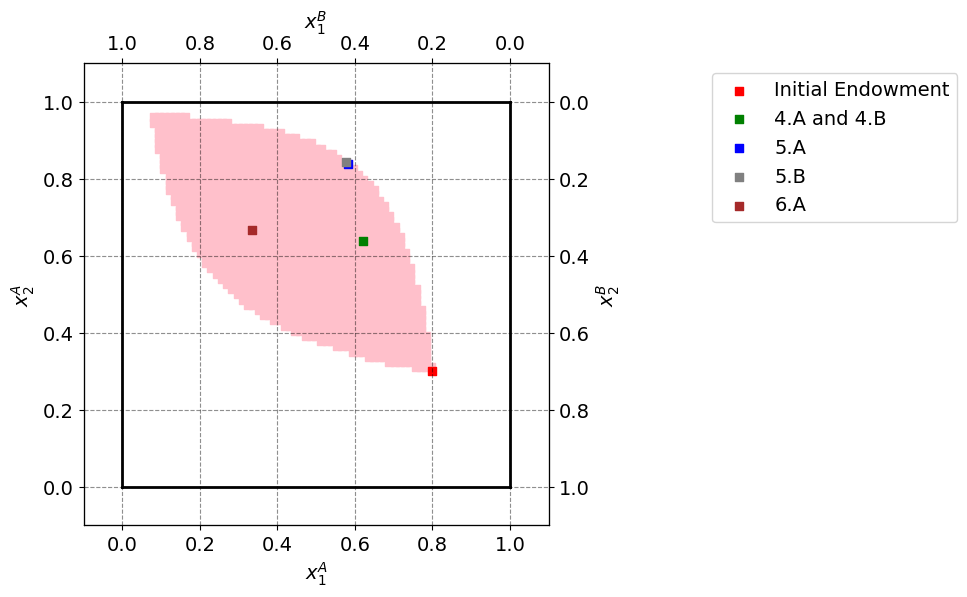

In [24]:
par = model.par
# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Inserting out results in the Edgeworth Box
for i in better_pairs:
    ax_A.scatter(i[0],i[1],marker='s',color='pink')

ax_A.scatter(par.w1A,par.w2A,marker='s',color='red', label='Initial Endowment')
ax_A.scatter(0.62175, 0.63964,marker='s',color='green', label='4.A and 4.B')
ax_A.scatter(0.581, 0.838 ,marker='s',color='blue', label='5.A')
ax_A.scatter(0.57575, 0.84444,marker='s',color='grey', label='5.B')
ax_A.scatter(0.3333, 0.6666,marker='s',color='brown', label='6.A')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')   

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

# Legend
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.9, 1.0))

### 7. <a id='toc2_4_'></a>[Draw random set](#toc0_)

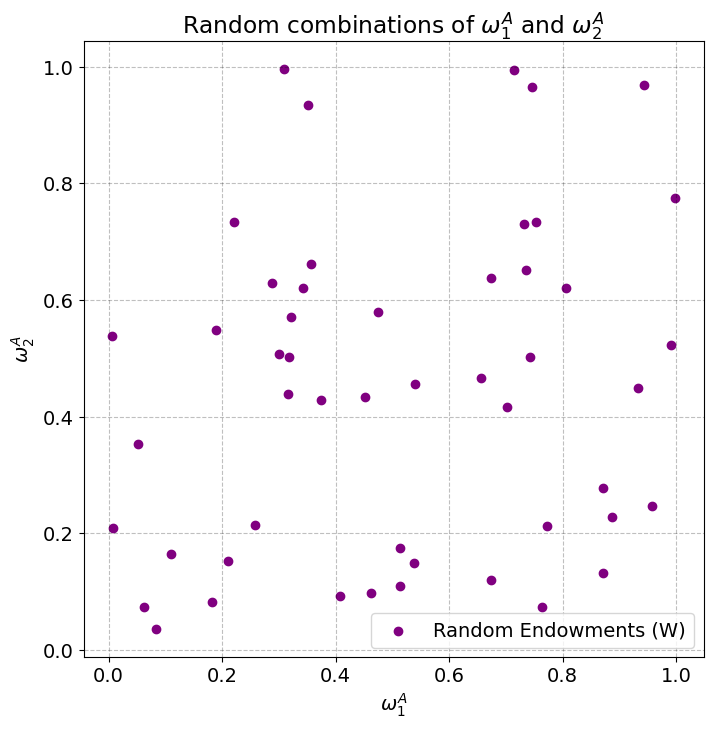

In [25]:
import random

# we Generate a set with 50 elements where each element is a tuple (w1A, w2A)
# with w1A and w2A drawn from a uniform distribution U(0,1)
np.random.seed(14)  # replication
omega_1A = np.random.uniform(0,1,50)
omega_2A = np.random.uniform(0,1,50)

# Plotting the random set W in the w1A-w2A space
plt.figure(figsize=(8,8))
plt.scatter(omega_1A, omega_2A, c='purple', label='Random Endowments (W)')
plt.xlabel('$\omega_1^A$')
plt.ylabel('$\omega_2^A$')
plt.title('Random combinations of $\omega_1^A$ and $\omega_2^A$')
plt.legend()
plt.show()

### 8. <a id='toc2_4_'></a>[Equilibrium for each set](#toc0_)

Result 1: x1A = 0.21982736023586516, x2A = 0.52986992642113, x1B = 0.7801725095068482, x2B = 0.4701302305643763
Result 2: x1A = 0.3279579038915444, x2A = 0.6612473290534799, x1B = 0.6720423091109102, x2B = 0.33875245621270417
Result 3: x1A = 0.3343704004052043, x2A = 0.6677030273602653, x1B = 0.6656286952156377, x2B = 0.3322978756154481
Result 4: x1A = 0.041826725681064277, x2A = 0.14865385365673825, x1B = 0.958173133482848, x2B = 0.8513463966118022
Result 5: x1A = 0.5360756709753194, x2A = 0.8221297598791326, x1B = 0.46392499236448914, x2B = 0.17786973146935894


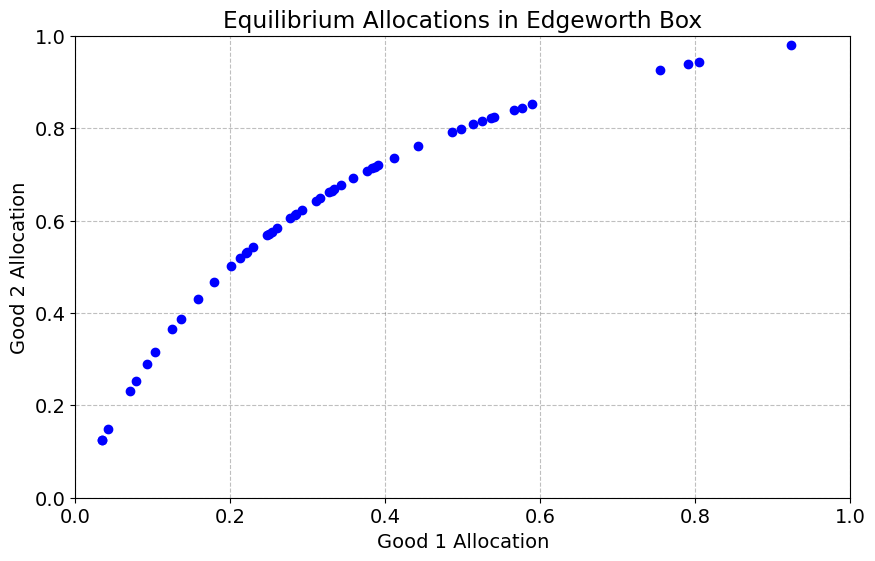

In [26]:
omega_1B = 1 - omega_1A  
omega_2B = 1 - omega_2A  

# Liste til at gemme resultaterne
results = []

# Loop over hver kombination af endowments
for i in range(len(omega_1A)):
    w1A = omega_1A[i]
    w2A = omega_2A[i]
    w1B = omega_1B[i]
    w2B = omega_2B[i]

    model = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=w1A, w2A=w2A)

    # Definér objective function
    def objective_func(p1):
        eps1, _ = model.check_market_clearing(p1)
        return abs(eps1)

    # Find den optimale pris
    res = optimize.minimize_scalar(
        objective_func,
        bounds=(0, 1e6),
        method='bounded'
    )

    # Udpak resultaterne
    optimal_p1 = res.x
    optimal_eps1, optimal_eps2 = model.check_market_clearing(optimal_p1)

    # Gem de resulterende allokeringer for både A og B
    x1A, x2A = model.demand_A(optimal_p1)
    x1B, x2B = model.demand_B(optimal_p1)

    # Gem resultaterne
    results.append({
        'w1A': w1A,
        'w2A': w2A,
        'w1B': w1B,
        'w2B': w2B,
        'optimal_p1': optimal_p1,
        'optimal_eps1': optimal_eps1,
        'optimal_eps2': optimal_eps2,
        'x1A': x1A,
        'x2A': x2A,
        'x1B': x1B,
        'x2B': x2B
    })

# Print en stikprøve af resultaterne for at kontrollere, at vi får forskellige værdier
for i, result in enumerate(results[:5]):
    print(f"Result {i+1}: x1A = {result['x1A']}, x2A = {result['x2A']}, x1B = {result['x1B']}, x2B = {result['x2B']}")

# Plot de resulterende allokeringer i en Edgeworth-boks
plt.figure(figsize=(10, 6))
for result in results:
    plt.plot(result['x1A'], result['x2A'], 'bo')

plt.xlabel('Good 1 Allocation')
plt.ylabel('Good 2 Allocation')
plt.title('Equilibrium Allocations in Edgeworth Box')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()